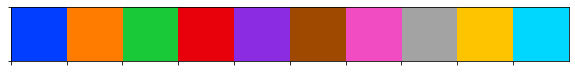

In [1]:
import pandas as pd
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# try different palette for plotting
# sns.set_palette(sns.color_palette("Paired", 20))
# sns.set_palette(sns.diverging_palette(255, 133, l=60, n=16, center="dark"))
colors3 = ["#9d6d00", "#903ee0", "#11dc79", "#f568ff", "#419500", "#013fb0", 
          "#f2b64c", "#007ae4", "#ff905a", "#33d3e3", "#9e003a", "#019085", 
          "#950065", "#afc98f", "#ff9bfa", "#83221d", "#01668a", "#ff7c7c", 
          "#643561", "#75608a"]
palette1 = sns.color_palette("BuGn", 6)[::-1][:4] \
           + sns.color_palette("OrRd", 6)[1:] \
           + sns.color_palette("PuBu", 6)[::-1][:-2] \
           + sns.color_palette("RdGy", 10)[6:]
# sns.set_palette(palette1)
sns.set_palette("bright",10)
sns.palplot(sns.color_palette())

In [2]:
# source https://github.com/pcm-dpc/COVID-19/
# transpose matrices for better data handling
! curl https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-regioni/dpc-covid19-ita-regioni.csv > ../external_data/dpc-covid19-ita-regioni.csv

# confirmed COVID-19 positive cases for Italy
data = pd.read_csv("../external_data/dpc-covid19-ita-regioni.csv")
data.head(10)

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
 15 65418   15 10131    0     0  10131      0  0:00:06 --:--:--  0:00:06 20931
100 65418  100 65418    0     0  65418      0  0:00:01 --:--:--  0:00:01  124k


,data,stato,codice_regione,denominazione_regione,lat,long,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_attualmente_positivi,nuovi_attualmente_positivi,dimessi_guariti,deceduti,totale_casi,tamponi,note_it,note_en
0,2020-02-24T18:00:00,ITA,13,Abruzzo,42.351222,13.398438,0,0,0,0,0,0,0,0,0,5,NaN,NaN
1,2020-02-24T18:00:00,ITA,17,Basilicata,40.639471,15.805148,0,0,0,0,0,0,0,0,0,0,NaN,NaN
2,2020-02-24T18:00:00,ITA,4,P.A. Bolzano,46.499335,11.356624,0,0,0,0,0,0,0,0,0,1,NaN,NaN
3,2020-02-24T18:00:00,ITA,18,Calabria,38.905976,16.594402,0,0,0,0,0,0,0,0,0,1,NaN,NaN
4,2020-02-24T18:00:00,ITA,15,Campania,40.839566,14.250850,0,0,0,0,0,0,0,0,0,10,NaN,NaN
5,2020-02-24T18:00:00,ITA,8,Emilia Romagna,44.494367,11.341721,10,2,12,6,18,18,0,0,18,148,NaN,NaN
6,2020-02-24T18:00:00,ITA,6,Friuli Venezia Giulia,45.649435,13.768136,0,0,0,0,0,0,0,0,0,58,NaN,NaN
7,2020-02-24T18:00:00,ITA,12,Lazio,41.892770,12.483667,1,1,2,0,2,2,1,0,3,124,NaN,NaN
8,2020-02-24T18:00:00,ITA,7,Liguria,44.411493,8.932699,0,0,0,0,0,0,0,0,0,1,NaN,NaN
9,2020-02-24T18:00:00,ITA,3,Lombardia,45.466794,9.190347,76,19,95,71,166,166,0,6,172,1463,NaN,NaN


In [3]:
# region_names = data["denominazione_regione"].unique()
dates = data["data"].unique()
conf = pd.DataFrame(columns = ["data"])
conf["data"] = dates
deaths = pd.DataFrame(columns = ["data"])
deaths["data"] = dates
tests = pd.DataFrame(columns = ["data"])
tests["data"] = dates

In [4]:
for name, group in data.groupby('denominazione_regione'):
    conf = conf.merge(group[["totale_casi","data"]], on='data', how='outer', suffixes=('_1', '_2'))
    conf.rename(columns={"totale_casi": name}, inplace=True)
    deaths = deaths.merge(group[["deceduti","data"]], on='data', how='outer', suffixes=('_1', '_2'))
    deaths.rename(columns={"deceduti": name}, inplace=True)
    tests = tests.merge(group[["tamponi","data"]], on='data', how='outer', suffixes=('_1', '_2'))
    tests.rename(columns={"tamponi": name}, inplace=True)
    
conf.set_index('data', inplace=True)
conf.index = pd.to_datetime(conf.index).date
deaths.set_index('data', inplace=True)
deaths.index = pd.to_datetime(deaths.index).date
tests.set_index('data', inplace=True)
tests.index = pd.to_datetime(tests.index).date

conf.tail()

,Abruzzo,Basilicata,Calabria,Campania,Emilia Romagna,Friuli Venezia Giulia,Lazio,Liguria,Lombardia,Marche,...,P.A. Bolzano,P.A. Trento,Piemonte,Puglia,Sardegna,Sicilia,Toscana,Umbria,Valle d'Aosta,Veneto
2020-03-23,663,90,292,1026,8535,930,1540,1924,28761,2569,...,724,1023,4861,906,359,721,2461,577,393,5505
2020-03-24,689,92,319,1101,9254,992,1728,2116,30703,2736,...,781,1110,5515,1005,421,846,2699,648,400,5948
2020-03-25,813,113,351,1199,10054,1139,1901,2305,32346,2934,...,858,1222,6024,1093,442,994,2972,710,401,6442
2020-03-26,946,134,393,1310,10816,1223,2096,2567,34889,3114,...,906,1297,6534,1182,494,1164,3226,802,408,6935
2020-03-27,1017,151,494,1454,11588,1317,2295,2696,37298,3196,...,1003,1391,7092,1334,530,1250,3450,884,452,7497


In [5]:
# select only countries with > 200 positive COVID-19 cases
contries_ordered = conf.max().sort_values(ascending=False)
print(contries_ordered[:10])

# sort columns by total number of positive cases
# # conf = conf.sort_values(conf.last_valid_index(), axis=1, ascending=False)
# deaths = deaths.sort_values(deaths.last_valid_index(), axis=1, ascending=False)
# recover = recover.sort_values(recover.last_valid_index(), axis=1, ascending=False)

Lombardia         37298
Emilia Romagna    11588
Veneto             7497
Piemonte           7092
Toscana            3450
Marche             3196
Liguria            2696
Lazio              2295
Campania           1454
P.A. Trento        1391
dtype: int64


In [6]:
# latest number of cases by region
print(conf.max())

Abruzzo                   1017
Basilicata                 151
Calabria                   494
Campania                  1454
Emilia Romagna           11588
Friuli Venezia Giulia     1317
Lazio                     2295
Liguria                   2696
Lombardia                37298
Marche                    3196
Molise                     109
P.A. Bolzano              1003
P.A. Trento               1391
Piemonte                  7092
Puglia                    1334
Sardegna                   530
Sicilia                   1250
Toscana                   3450
Umbria                     884
Valle d'Aosta              452
Veneto                    7497
dtype: int64


In [7]:
# remove Cruise Ship
# conf.drop(list(conf.filter(regex = "Cruise")), inplace=True)
# deaths.drop(list(conf.filter(regex = "Cruise")), inplace=True)
# deaths.drop(list(conf.filter(regex = "Cruise")), inplace=True)

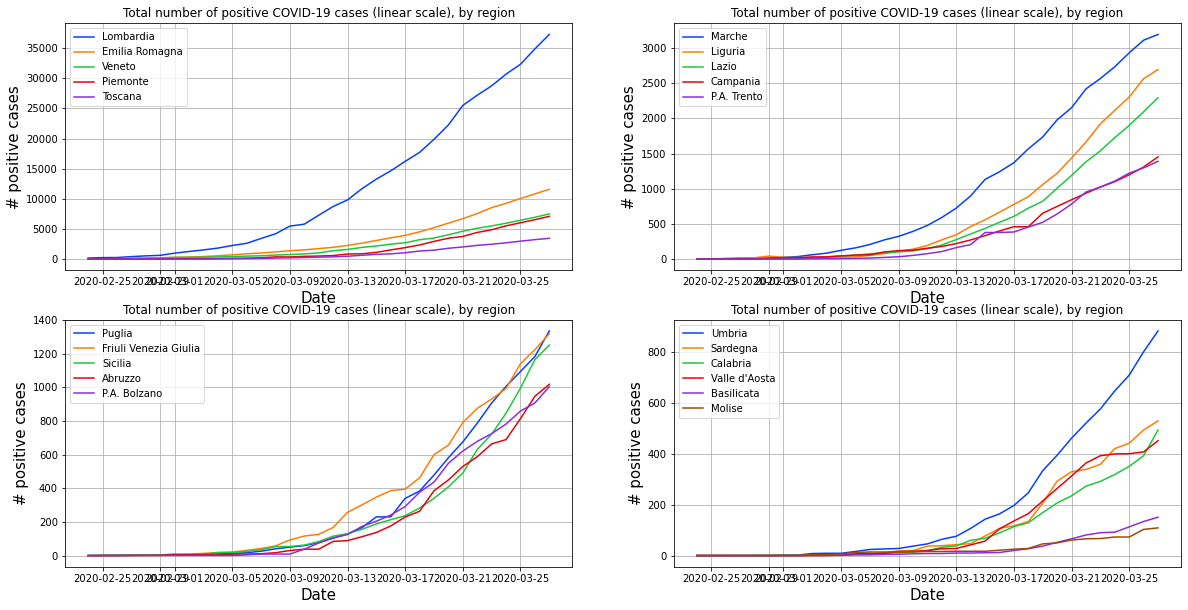

In [8]:
nrow=2
ncol=2
count=0
fig, axes = plt.subplots(nrows=nrow, ncols=ncol)

for r in range(nrow):
    for c in range(ncol):
        #show total number of positive cases
        plot_countries = contries_ordered[count*5:(count+1)*5 if count<3 else len(contries_ordered.to_list())].index
        # print(count*10,(count+1)*10,plot_countries)
        conf[plot_countries].plot(grid=True, ax=axes[r,c],
                 title='Total number of positive COVID-19 cases (linear scale), by region', figsize = (20,10))
        axes[r,c].set_xlabel("Date", fontsize=15)
        axes[r,c].set_ylabel("# positive cases", fontsize=15)
        count+=1

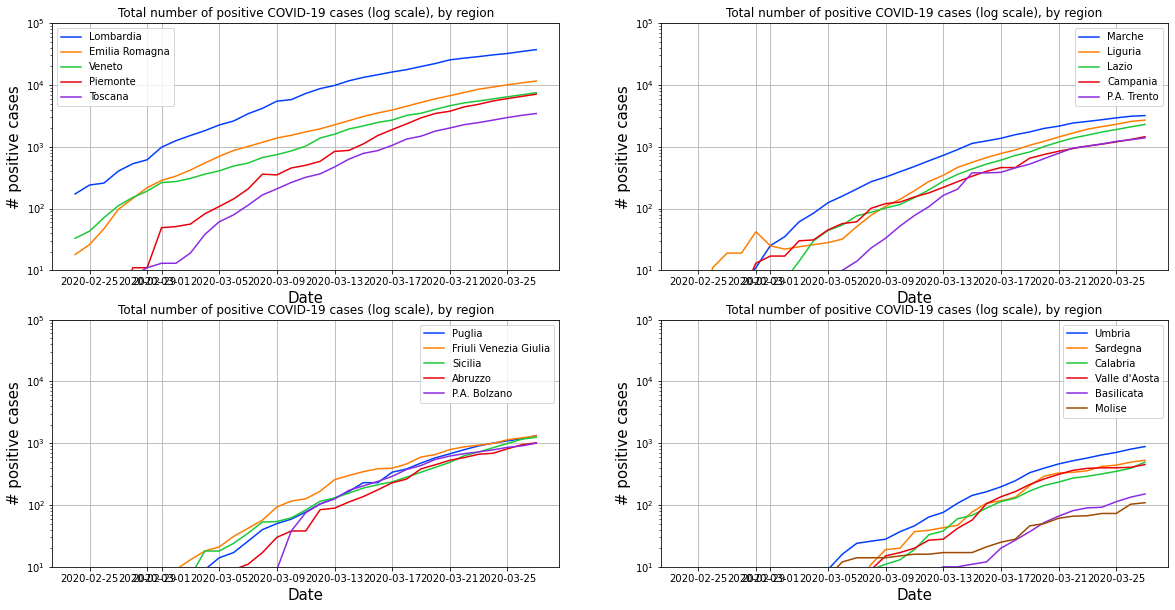

In [9]:
nrow=2
ncol=2
count=0
fig, axes = plt.subplots(nrows=nrow, ncols=ncol)

for r in range(nrow):
    for c in range(ncol):
        #show total number of positive cases
        plot_countries = contries_ordered[count*5:(count+1)*5 if count<3 else len(contries_ordered.to_list())].index
        # print(count*10,(count+1)*10,plot_countries)
        conf[plot_countries].plot(logy=True, grid=True, ax=axes[r,c],
                 title='Total number of positive COVID-19 cases (log scale), by region', figsize = (20,10))
        axes[r,c].set_xlabel("Date", fontsize=15)
        axes[r,c].set_ylabel("# positive cases", fontsize=15)
        axes[r,c].set_ylim(1e1,1e5)
        count+=1

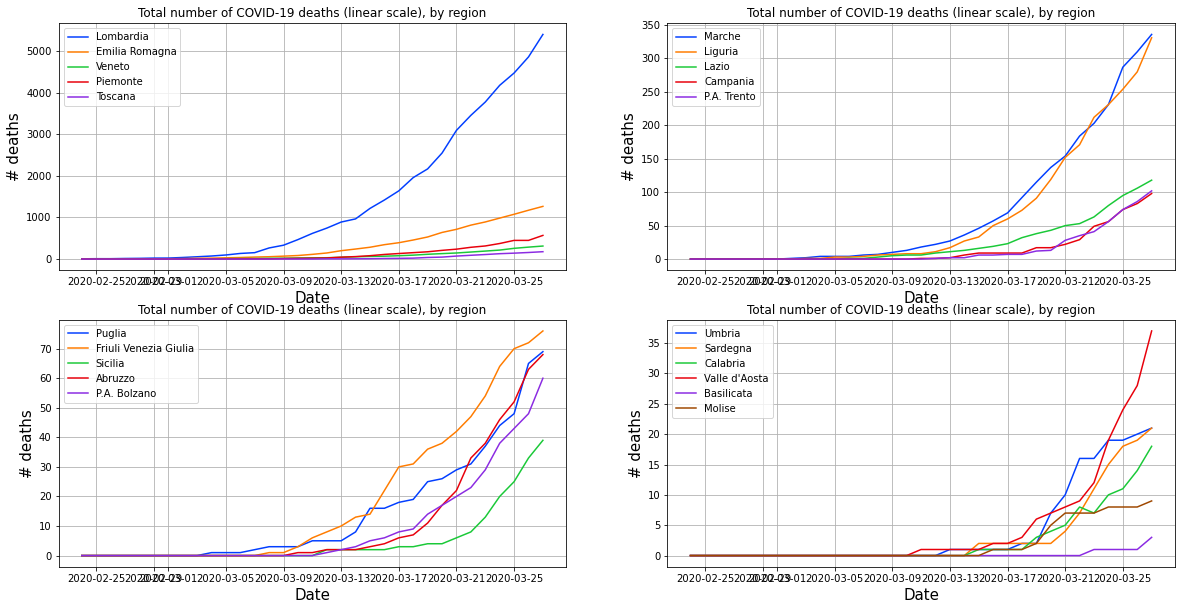

In [10]:
nrow=2
ncol=2
count=0
fig, axes = plt.subplots(nrows=nrow, ncols=ncol)

for r in range(nrow):
    for c in range(ncol):
        #show total number of positive cases
        plot_countries = contries_ordered[count*5:(count+1)*5 if count<3 else len(contries_ordered.to_list())].index
        # print(count*10,(count+1)*10,plot_countries)
        deaths[plot_countries].plot(grid=True, ax=axes[r,c],
                 title='Total number of COVID-19 deaths (linear scale), by region', figsize = (20,10))
        axes[r,c].set_xlabel("Date", fontsize=15)
        axes[r,c].set_ylabel("# deaths", fontsize=15)
        count+=1

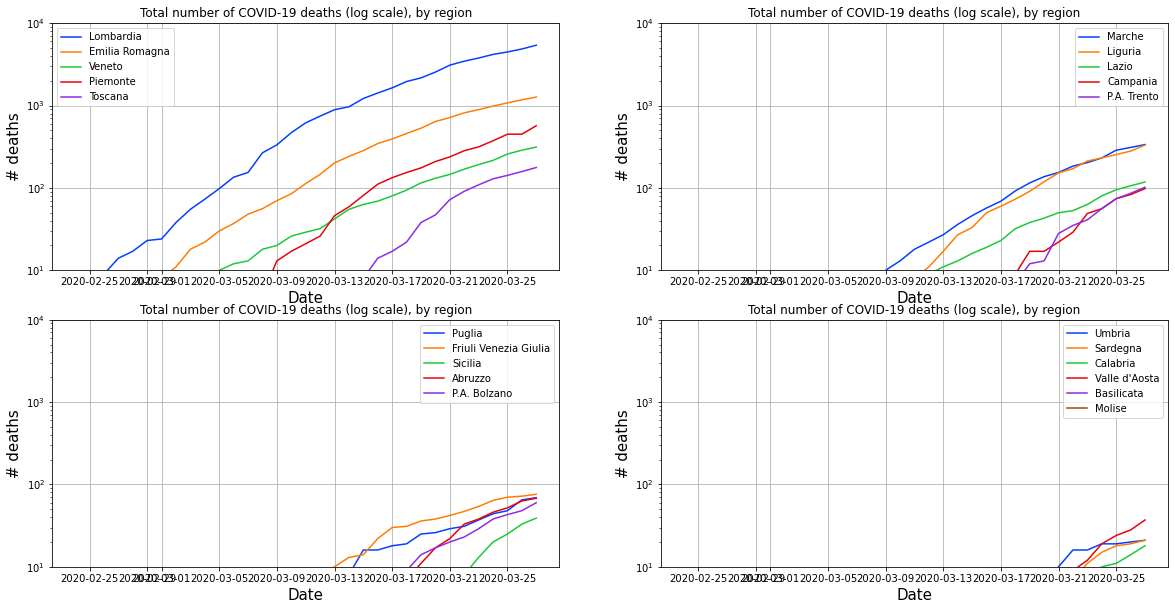

In [11]:
nrow=2
ncol=2
count=0
fig, axes = plt.subplots(nrows=nrow, ncols=ncol)

for r in range(nrow):
    for c in range(ncol):
        #show total number of positive cases
        plot_countries = contries_ordered[count*5:(count+1)*5 if count<3 else len(contries_ordered.to_list())].index
        # print(count*10,(count+1)*10,plot_countries)
        deaths[plot_countries].plot(logy=True, grid=True, ax=axes[r,c],
                 title='Total number of COVID-19 deaths (log scale), by region', figsize = (20,10))
        axes[r,c].set_xlabel("Date", fontsize=15)
        axes[r,c].set_ylabel("# deaths", fontsize=15)
        axes[r,c].set_ylim(1e1,1e4)
        count+=1

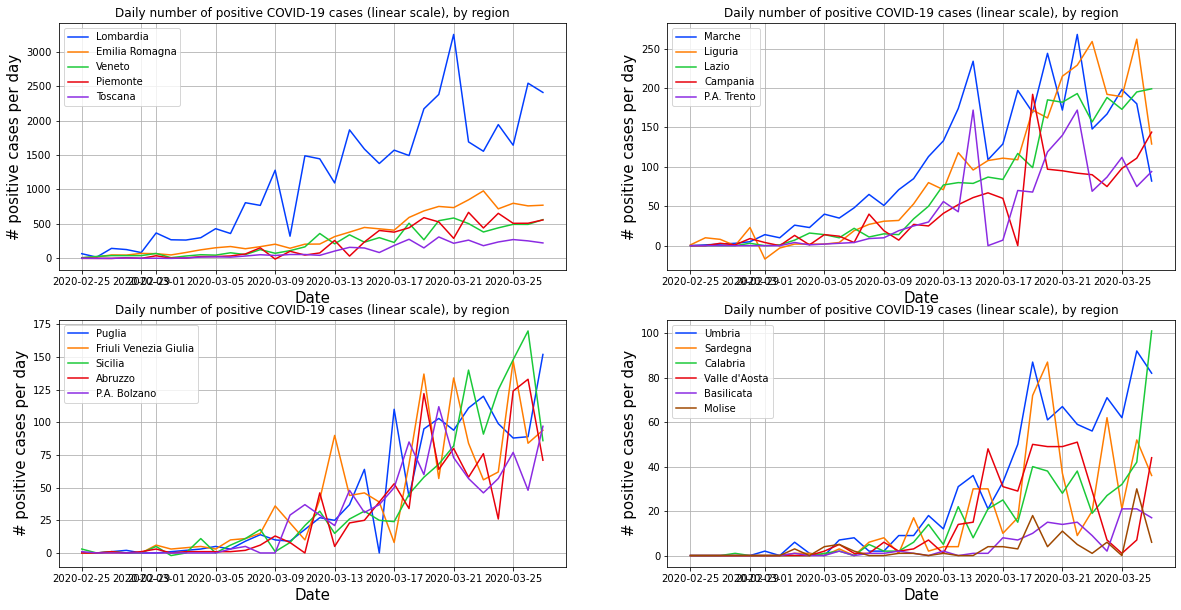

In [12]:
conf_daily = conf - conf.shift(1)

nrow=2
ncol=2
count=0
fig, axes = plt.subplots(nrows=nrow, ncols=ncol)

for r in range(nrow):
    for c in range(ncol):
        #show total number of positive cases
        plot_countries = contries_ordered[count*5:(count+1)*5 if count<3 else len(contries_ordered.to_list())].index
        # print(count*10,(count+1)*10,plot_countries)
        conf_daily[plot_countries].plot(grid=True, ax=axes[r,c],
                 title='Daily number of positive COVID-19 cases (linear scale), by region', figsize = (20,10))
        axes[r,c].set_xlabel("Date", fontsize=15)
        axes[r,c].set_ylabel("# positive cases per day", fontsize=15)
        count+=1

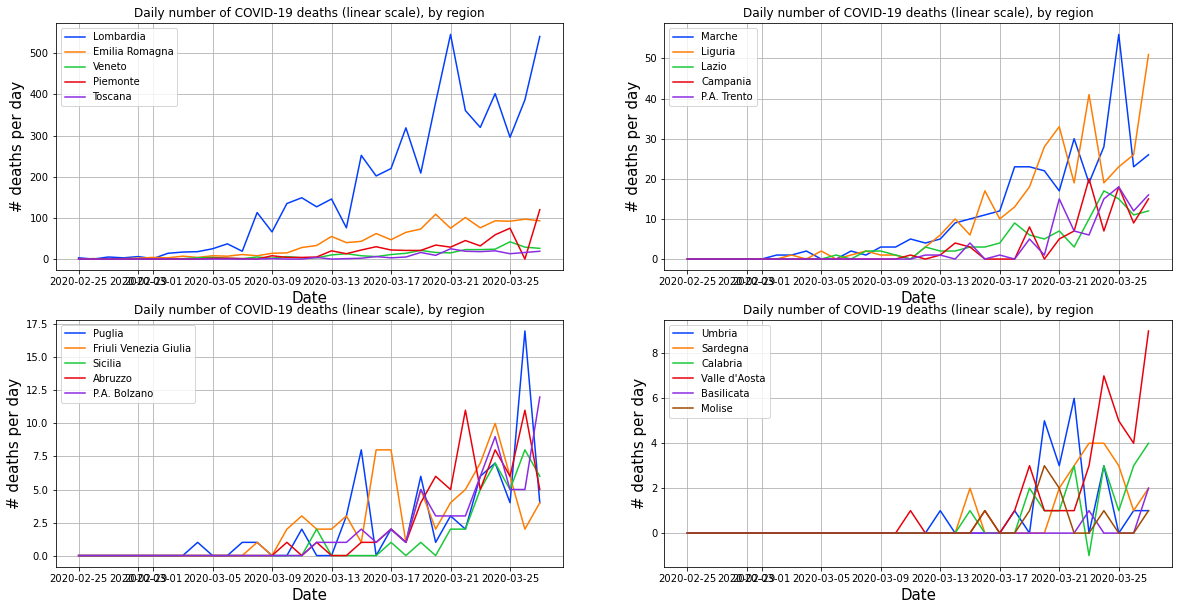

In [13]:
deaths_daily = deaths - deaths.shift(1)

nrow=2
ncol=2
count=0
fig, axes = plt.subplots(nrows=nrow, ncols=ncol)

for r in range(nrow):
    for c in range(ncol):
        #show total number of positive cases
        plot_countries = contries_ordered[count*5:(count+1)*5 if count<3 else len(contries_ordered.to_list())].index
        # print(count*10,(count+1)*10,plot_countries)
        deaths_daily[plot_countries].plot(grid=True, ax=axes[r,c],
                 title='Daily number of COVID-19 deaths (linear scale), by region', figsize = (20,10))
        axes[r,c].set_xlabel("Date", fontsize=15)
        axes[r,c].set_ylabel("# deaths per day", fontsize=15)
        count+=1

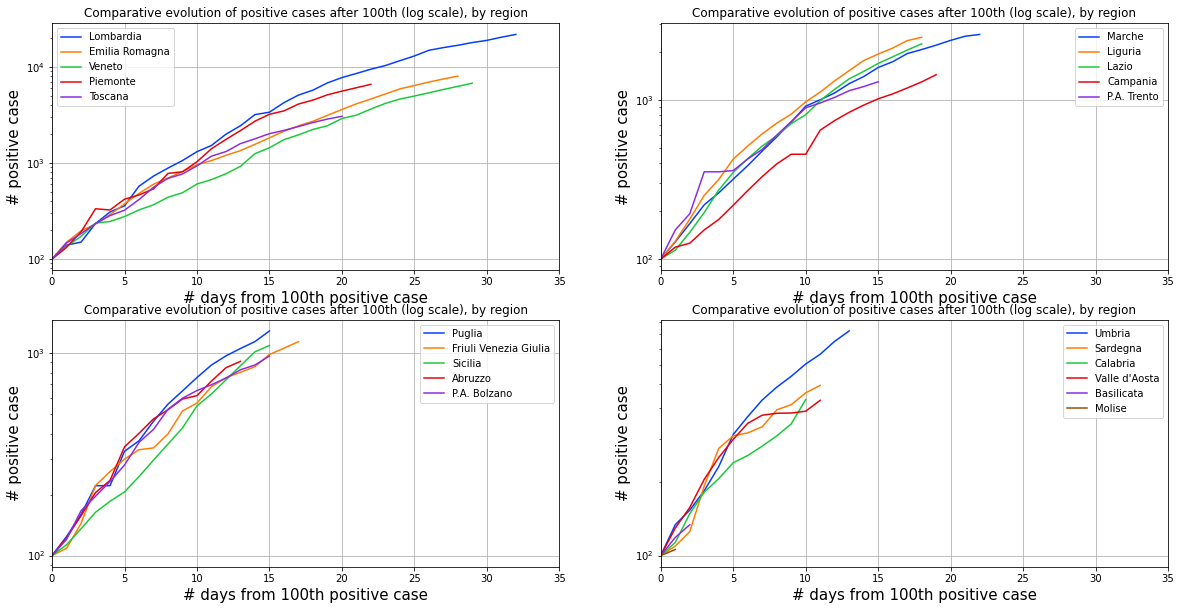

In [14]:
count_after = 100
conf_align_start = conf[conf > count_after]
conf_align_start = conf_align_start.apply(lambda x: pd.Series(x.dropna().values))
conf_align_start = conf_align_start.loc[:].div(conf_align_start.iloc[0][:]/count_after) # normalize to same start

nrow=2
ncol=2
count=0
fig, axes = plt.subplots(nrows=nrow, ncols=ncol)

for r in range(nrow):
    for c in range(ncol):
        #show total number of positive cases
        plot_countries = contries_ordered[count*5:(count+1)*5 if count<3 else len(contries_ordered.to_list())].index
        # print(count*10,(count+1)*10,plot_countries)
        conf_align_start[plot_countries].plot(logy=True, grid=True, ax=axes[r,c],
                 title='Comparative evolution of positive cases after 100th (log scale), by region', figsize = (20,10))
        axes[r,c].set_xlabel("# days from 100th positive case", fontsize=15)
        axes[r,c].set_ylabel("# positive case", fontsize=15)
        axes[r,c].set_xlim(0,35)
        count+=1

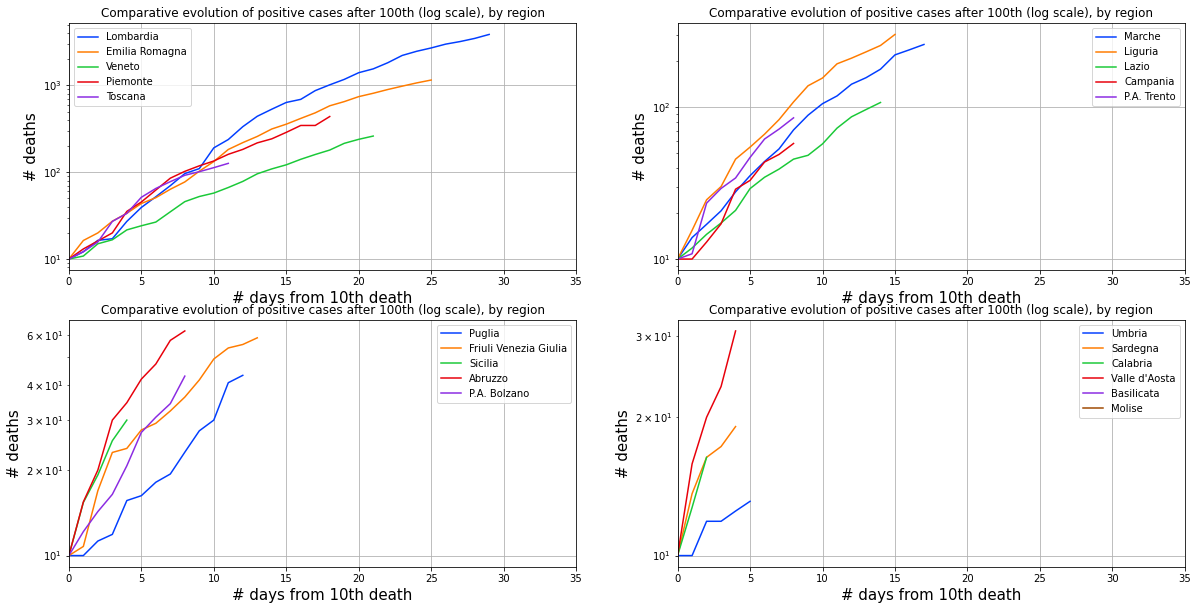

In [15]:
count_after = 10
deaths_align_start = deaths[deaths > count_after] 
deaths_align_start = deaths_align_start.apply(lambda x: pd.Series(x.dropna().values))
deaths_align_start = deaths_align_start.loc[:].div(deaths_align_start.iloc[0][:]/count_after)

nrow=2
ncol=2
count=0
fig, axes = plt.subplots(nrows=nrow, ncols=ncol)

for r in range(nrow):
    for c in range(ncol):
        #show total number of positive cases
        plot_countries = contries_ordered[count*5:(count+1)*5 if count<3 else len(contries_ordered.to_list())].index
        # print(count*10,(count+1)*10,plot_countries)
        deaths_align_start[plot_countries].plot(logy=True, grid=True, ax=axes[r,c],
                 title='Comparative evolution of positive cases after 100th (log scale), by region', figsize = (20,10))
        axes[r,c].set_xlabel("# days from 10th death", fontsize=15)
        axes[r,c].set_ylabel("# deaths", fontsize=15)
        axes[r,c].set_xlim(0,35)
        count+=1

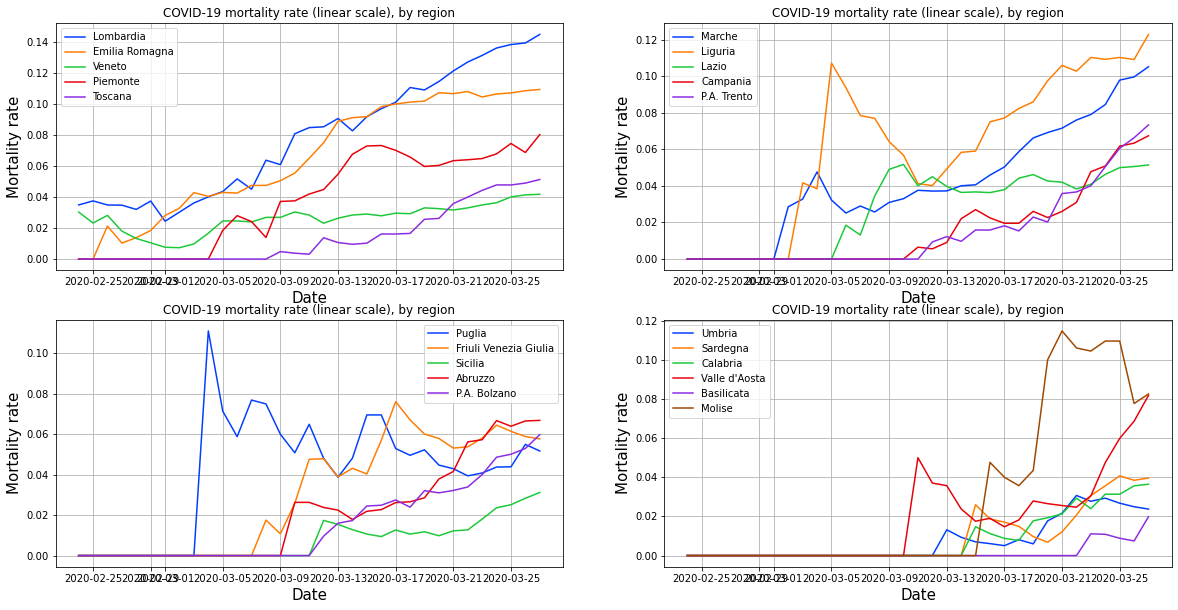

In [16]:
mortality = deaths.divide(conf.replace(0, 1))

nrow=2
ncol=2
count=0
fig, axes = plt.subplots(nrows=nrow, ncols=ncol)

for r in range(nrow):
    for c in range(ncol):
        #show total number of positive cases
        plot_countries = contries_ordered[count*5:(count+1)*5 if count<3 else len(contries_ordered.to_list())].index
        # print(count*10,(count+1)*10,plot_countries)
        mortality[plot_countries].plot(grid=True, ax=axes[r,c],
                 title='COVID-19 mortality rate (linear scale), by region', figsize = (20,10))
        axes[r,c].set_xlabel("Date", fontsize=15)
        axes[r,c].set_ylabel("Mortality rate", fontsize=15)
        # axes[r,c].set_ylim(0,0.12)
        count+=1

In [17]:
# retrieve population information
# source http://dati-censimentopopolazione.istat.it/Index.aspx?lang=en
population = pd.read_csv("../external_data/DICA_POP_RESPRE_Data_9d65c5fb-6eaa-413c-a013-61a8ad3bce06.csv", encoding = "ISO-8859-1")

In [18]:
# rename population country names that don't match COVID-19 data
population = population.replace('Emilia-Romagna', 'Emilia Romagna')
population = population.replace('Friuli-Venezia Giulia', 'Friuli Venezia Giulia')
population = population.replace("Valle d'Aosta / Vallée d'Aoste", "Valle d\'Aosta")
print(population["Territory"])

0       Bologna
1       Bologna
2       Bologna
3       Bologna
4       Bologna
         ...   
3397    Trieste
3398    Venezia
3399    Venezia
3400     Verona
3401     Verona
Name: Territory, Length: 3402, dtype: object


In [19]:
population = population[(population["Territory"].isin(set(list(conf.columns.values)))) & 
                       (population["Data type"] == "present population (absolute values)") &
                       (population["Gender"] == "total") &
                       (population["Age"] == "total") ]
population = population[["Territory","0"]].transpose()
population.columns = population.iloc[0]
population = population.iloc[1:]
population = population.loc[:,~population.columns.duplicated()]

In [20]:
# create copy
conf_no_norm = conf.copy()

# concatenate dataset
conf_population_norm = pd.concat([population,conf])
conf_population_norm.head()

,Piemonte,Valle d'Aosta,Liguria,Lombardia,Veneto,Friuli Venezia Giulia,Emilia Romagna,Toscana,Umbria,Marche,...,Abruzzo,Molise,Campania,Puglia,Basilicata,Calabria,Sicilia,Sardegna,P.A. Bolzano,P.A. Trento
0,4.39384e+06,128664,1.60573e+06,9.80737e+06,4.95495e+06,1.23702e+06,4.44907e+06,3.76008e+06,917784,1.59126e+06,...,1.31404e+06,308967,5.84041e+06,4.09045e+06,573458,1.93658e+06,5.1511e+06,1.64133e+06,NaN,NaN
2020-02-24,3,0,0,172,33,0,18,0,0,0,...,0,0,0,0,0,0,0,0,0.0,0.0
2020-02-25,3,0,1,240,43,0,26,2,0,0,...,0,0,0,0,0,0,3,0,1.0,0.0
2020-02-26,3,0,11,258,71,0,47,2,0,1,...,0,0,0,0,0,0,3,0,1.0,0.0
2020-02-27,2,0,19,403,111,0,97,2,0,3,...,1,0,3,1,0,0,4,0,1.0,0.0


In [21]:
# divide cases rows by population/10/1e3 row to obtain number of cases per 1e4 persons
conf_population_norm = conf_population_norm.loc[:].div(conf_population_norm.iloc[0][:]/10/1e3)

In [22]:
# remove population row
conf_population_norm = conf_population_norm.iloc[1:]
conf_population_norm.dropna(axis=1, inplace=True)
conf_population_norm.tail()

,Piemonte,Valle d'Aosta,Liguria,Lombardia,Veneto,Friuli Venezia Giulia,Emilia Romagna,Toscana,Umbria,Marche,Lazio,Abruzzo,Molise,Campania,Puglia,Basilicata,Calabria,Sicilia,Sardegna
2020-03-23,11.0632,30.5447,11.9821,29.3259,11.1101,7.51804,19.1838,6.54508,6.28688,16.1444,2.71151,5.04549,2.16852,1.75673,2.21491,1.56943,1.50782,1.3997,2.18725
2020-03-24,12.5517,31.0887,13.1778,31.306,12.0042,8.01924,20.7999,7.17804,7.06048,17.1939,3.04253,5.24335,2.36271,1.88514,2.45694,1.6043,1.64724,1.64237,2.56499
2020-03-25,13.7101,31.1664,14.3549,32.9813,13.0011,9.20757,22.598,7.90409,7.73603,18.4382,3.34714,6.187,2.36271,2.05294,2.67208,1.9705,1.81248,1.92969,2.69294
2020-03-26,14.8708,31.7105,15.9865,35.5743,13.9961,9.88662,24.3107,8.57961,8.73844,19.5693,3.69048,7.19914,3.33369,2.24299,2.88966,2.3367,2.02935,2.25971,3.00975
2020-03-27,16.1408,35.1303,16.7899,38.0306,15.1303,10.6465,26.0459,9.17534,9.6319,20.0846,4.04086,7.73946,3.52788,2.48955,3.26125,2.63315,2.55089,2.42667,3.22909


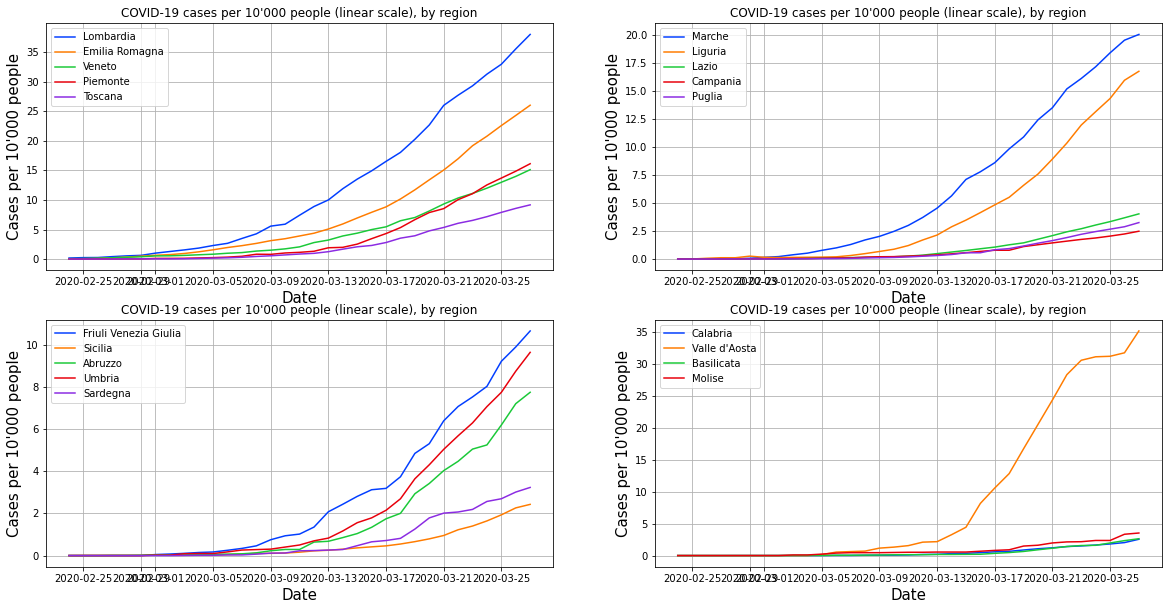

In [23]:
contries_ordered2 = [country for country in contries_ordered.index.to_list() if not "P.A." in country]

nrow=2
ncol=2
count=0
fig, axes = plt.subplots(nrows=nrow, ncols=ncol)

for r in range(nrow):
    for c in range(ncol):
        #show total number of positive cases
        plot_countries = contries_ordered2[count*5:(count+1)*5 if count<3 else len(contries_ordered2)]
        # print(count*10,(count+1)*10,plot_countries)
        conf_population_norm[plot_countries].plot(grid=True, ax=axes[r,c],
                 title="COVID-19 cases per 10'000 people (linear scale), by region", figsize = (20,10))
        axes[r,c].set_xlabel("Date", fontsize=15)
        axes[r,c].set_ylabel("Cases per 10'000 people", fontsize=15)
        count+=1

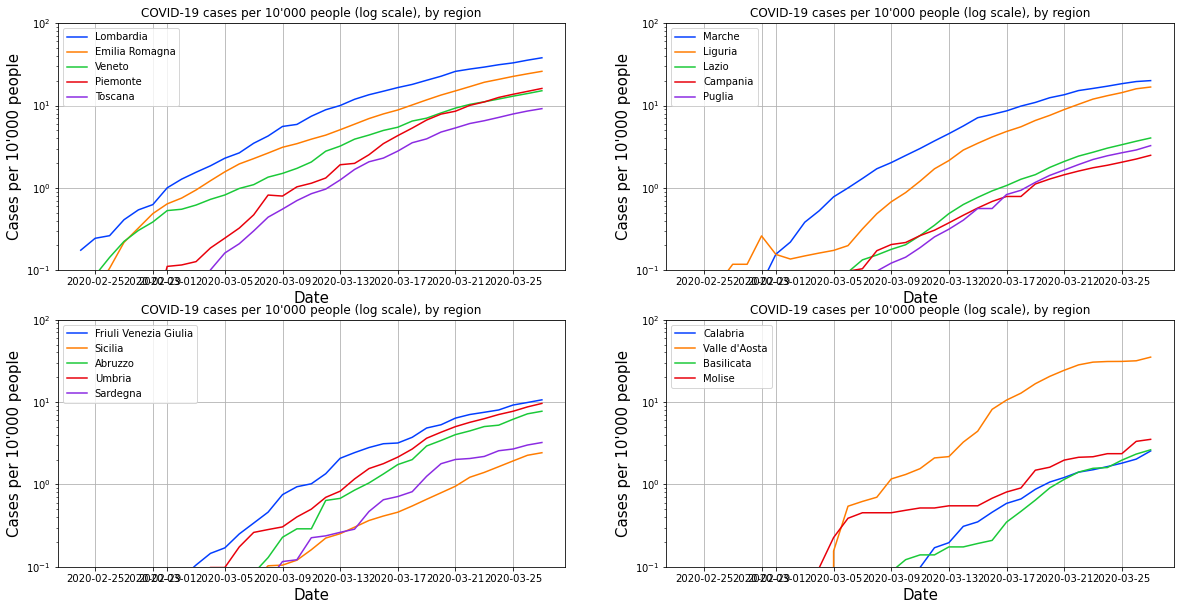

In [24]:
nrow=2
ncol=2
count=0
fig, axes = plt.subplots(nrows=nrow, ncols=ncol)

for r in range(nrow):
    for c in range(ncol):
        #show total number of positive cases
        plot_countries = contries_ordered2[count*5:(count+1)*5 if count<3 else len(contries_ordered2)]
        # print(count*10,(count+1)*10,plot_countries)
        conf_population_norm[plot_countries].plot(logy=True, grid=True, ax=axes[r,c],
                 title="COVID-19 cases per 10'000 people (log scale), by region", figsize = (20,10))
        axes[r,c].set_xlabel("Date", fontsize=15)
        axes[r,c].set_ylabel("Cases per 10'000 people", fontsize=15)
        axes[r,c].set_ylim(1e-1,1e2)
        count+=1

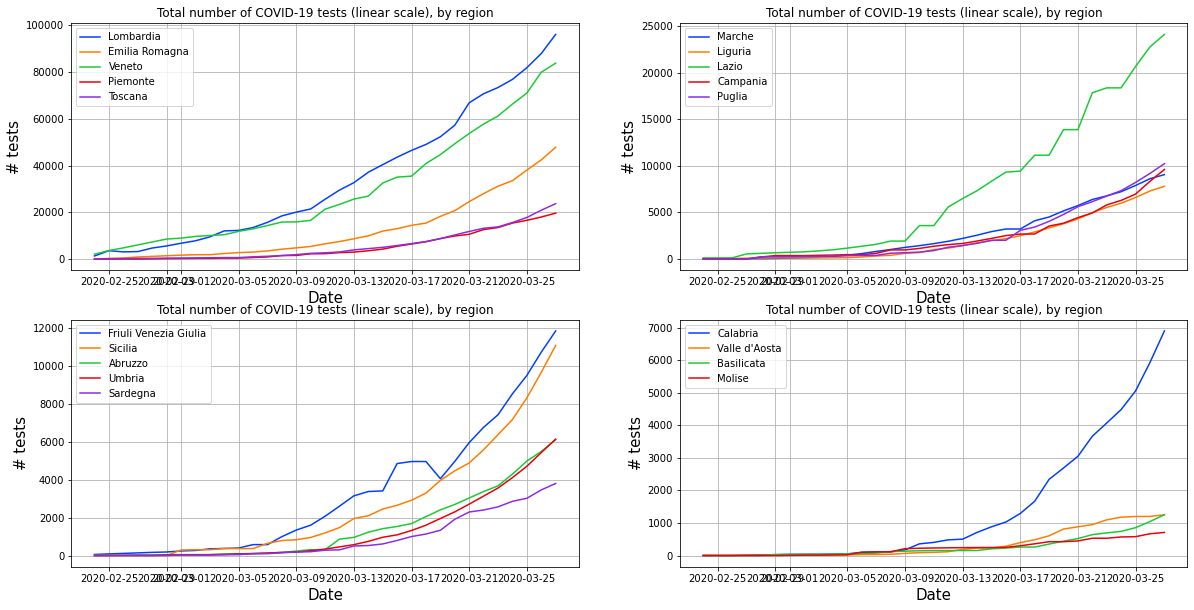

In [25]:
contries_ordered2 = [country for country in contries_ordered.index.to_list() if not "P.A." in country]

nrow=2
ncol=2
count=0
fig, axes = plt.subplots(nrows=nrow, ncols=ncol)

for r in range(nrow):
    for c in range(ncol):
        #show total number of positive cases
        plot_countries = contries_ordered2[count*5:(count+1)*5 if count<3 else len(contries_ordered2)]
        # print(count*10,(count+1)*10,plot_countries)
        tests[plot_countries].plot(grid=True, ax=axes[r,c],
                 title='Total number of COVID-19 tests (linear scale), by region', figsize = (20,10))
        axes[r,c].set_xlabel("Date", fontsize=15)
        axes[r,c].set_ylabel("# tests", fontsize=15)
        count+=1

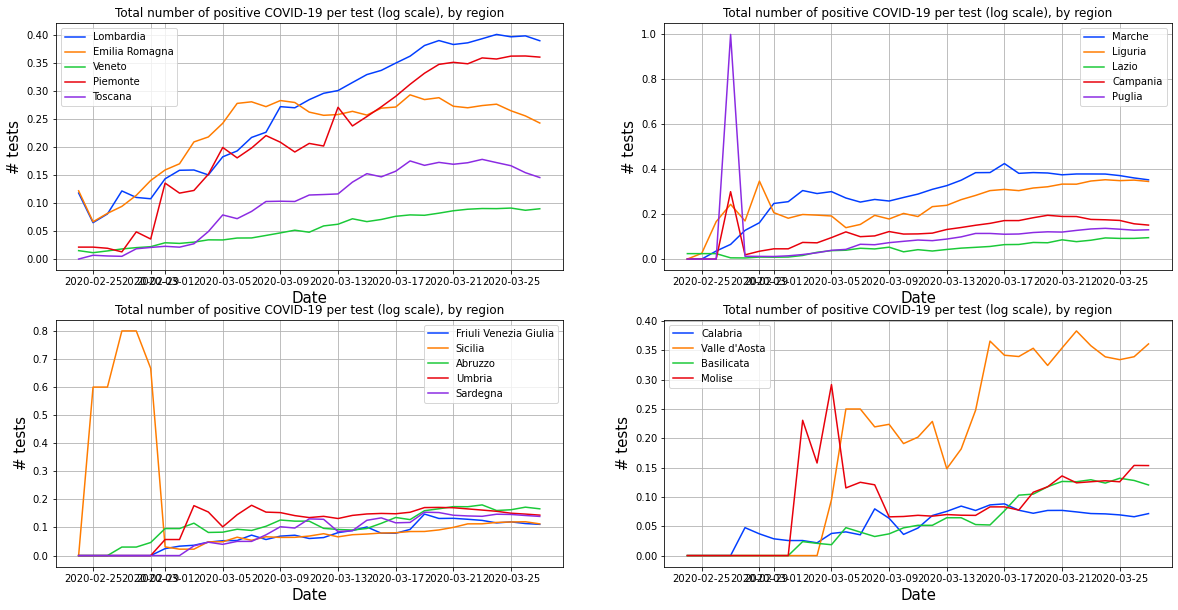

In [26]:
conf_per_test = conf_no_norm.divide(tests.replace(0, 1))

nrow=2
ncol=2
count=0
fig, axes = plt.subplots(nrows=nrow, ncols=ncol)

for r in range(nrow):
    for c in range(ncol):
        #show total number of positive cases
        plot_countries = contries_ordered2[count*5:(count+1)*5 if count<3 else len(contries_ordered2)]
        # print(count*10,(count+1)*10,plot_countries)
        conf_per_test[plot_countries].plot(grid=True, ax=axes[r,c],
                 title='Total number of positive COVID-19 per test (log scale), by region', figsize = (20,10))
        axes[r,c].set_xlabel("Date", fontsize=15)
        axes[r,c].set_ylabel("# tests", fontsize=15)
        count+=1

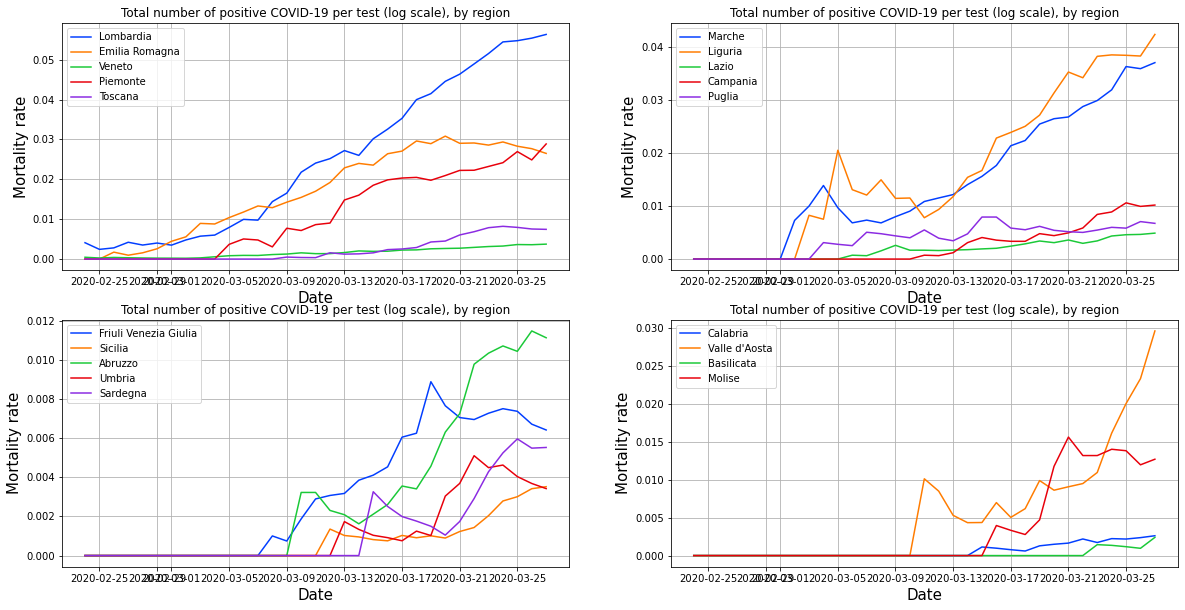

In [27]:
mortality_per_test = deaths.divide(tests.replace(0, 1))

nrow=2
ncol=2
count=0
fig, axes = plt.subplots(nrows=nrow, ncols=ncol)

for r in range(nrow):
    for c in range(ncol):
        #show total number of positive cases
        plot_countries = contries_ordered2[count*5:(count+1)*5 if count<3 else len(contries_ordered2)]
        # print(count*10,(count+1)*10,plot_countries)
        mortality_per_test[plot_countries].plot(grid=True, ax=axes[r,c],
                 title='Total number of positive COVID-19 per test (log scale), by region', figsize = (20,10))
        axes[r,c].set_xlabel("Date", fontsize=15)
        axes[r,c].set_ylabel("Mortality rate", fontsize=15)
        count+=1

KeyError: <matplotlib.axes._subplots.AxesSubplot object at 0x000001837FAD8308>

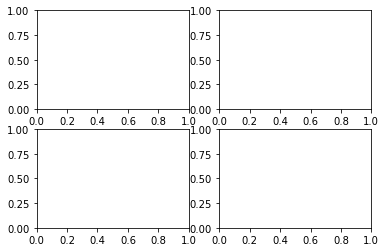

In [28]:
tests_7d_ago = tests[tests.columns.values].shift(7)
tests_7d_ago = tests_7d_ago.dropna()

mortality_after_7d_per_test = deaths.divide(tests_7d_ago.replace(0, 1))

nrow=2
ncol=2
count=0
fig, axes = plt.subplots(nrows=nrow, ncols=ncol)

for r in range(nrow):
    for c in range(ncol):
        #show total number of positive cases
        plot_countries = contries_ordered2[count*5:(count+1)*5 if count<3 else len(contries_ordered2)]
        # print(count*10,(count+1)*10,plot_countries)
        mortality_after_7d_per_test[plot_countries].plot(grid=True, x=axes[r,c],
                 title='Mortality rate per COVID-19 test after 7 days (linear scale), by region', figsize = (20,10))
        axes[r,c].set_xlabel("Date", fontsize=15)
        axes[r,c].set_ylabel("Mortality rate", fontsize=15)
        axes[r,c].set_ylim(0,0.12)

        count+=1

In [ ]:
tests_14d_ago = tests[tests.columns.values].shift(14)
tests_14d_ago = tests_14d_ago.dropna()

mortality_after_14d_per_test = deaths.divide(tests_14d_ago.replace(0, 1))

nrow=2
ncol=2
count=0
fig, axes = plt.subplots(nrows=nrow, ncols=ncol)

for r in range(nrow):
    for c in range(ncol):
        #show total number of positive cases
        plot_countries = contries_ordered2[count*5:(count+1)*5 if count<3 else len(contries_ordered2)]
        # print(count*10,(count+1)*10,plot_countries)
        mortality_after_14d_per_test[plot_countries].plot(grid=True, ax=axes[r,c],
                 title='Mortality rate per COVID-19 test after 14 days (linear scale), by region', figsize = (20,10))
        axes[r,c].set_xlabel("Date", fontsize=15)
        axes[r,c].set_ylabel("Mortality rate", fontsize=15)
        axes[r,c].set_ylim(0,0.6)
        count+=1